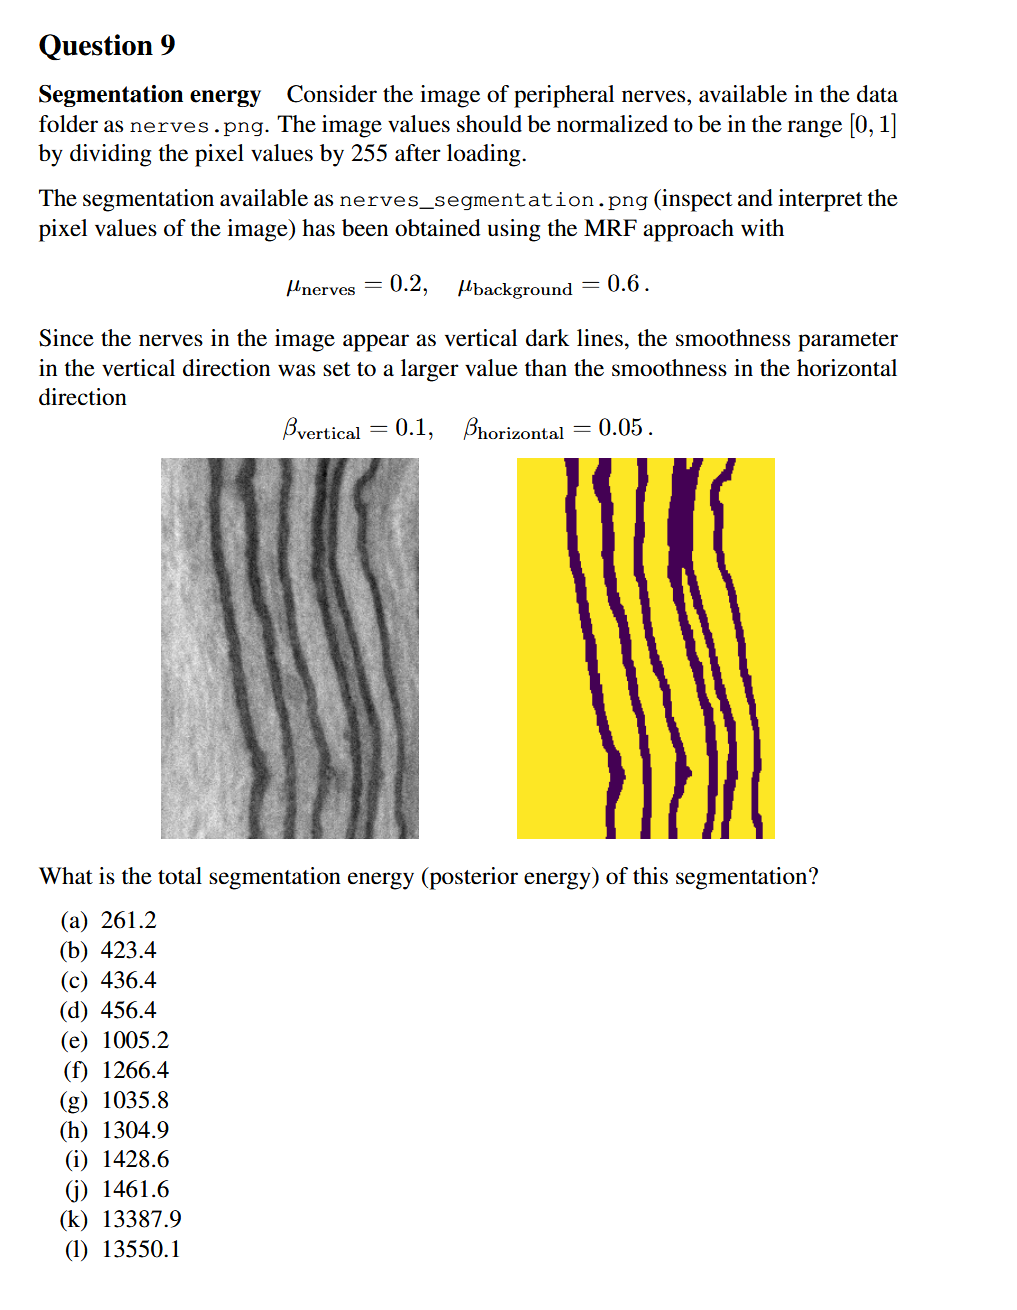

In [1]:
from skimage import io
import numpy as np
import matplotlib.pyplot as plt
%pip install scipy
import numpy as np 
import matplotlib.pyplot as plt
import skimage
from scipy.ndimage import convolve
from scipy.ndimage import gaussian_filter1d, gaussian_filter, gaussian_gradient_magnitude
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import convolve
from skimage.io import imread

Note: you may need to restart the kernel to use updated packages.


Max value of im_nerves: 1.0
Min value of im_nerves: 0.0
Max value of im_segm: 1.0
Min value of im_segm: 0.0
Length of nerves image: 78200
Unique values in im_segm: (array([0., 1.]), array([18071, 60129]))
Mean value of im_nerves: 0.23108695652173913


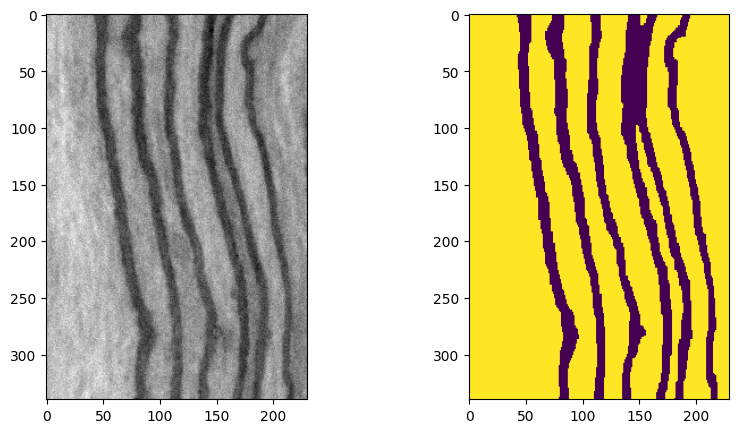

In [17]:
im_nerves = io.imread('data/nerves/nerves.png', as_gray=True).astype(np.float64) / 255.0
im_segm = io.imread('data/nerves/nerves_segmentation.png').astype(np.float64) / 255.0

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(im_nerves, cmap='gray')
ax[1].imshow(im_segm)

# max and min values of the images 

print("Max value of im_nerves:", np.max(im_nerves))
print("Min value of im_nerves:", np.min(im_nerves))

print("Max value of im_segm:", np.max(im_segm))
print("Min value of im_segm:", np.min(im_segm))


len_nerves = 18071 + 60129 
print("Length of nerves image:", len_nerves)
# print unique values of the nerves segmentation image

print("Unique values in im_segm:", np.unique(im_segm, return_counts=True))
# print number of unique values in the nerves segmentation image

#
mu_nerves = 18071 / len_nerves
print("Mean value of im_nerves:", mu_nerves)

In [9]:
def segmentation_energy(S, D, mu, beta):
    # Step 1: Compute intensity realization
    intensity_realization = np.zeros_like(D)
    for i in range(len(mu)):
        intensity_realization[S == i] = mu[i]
    
    # Step 2: Calculate likelihood energy (V1)
    V1 = np.sum((D - intensity_realization)**2)
    
    # Step 3: Calculate prior energy (V2)
    V2 = 0
    
    # Horizontal neighbors
    horizontal_diff = (S[:, :-1] != S[:, 1:])
    V2 += np.sum(horizontal_diff) * beta
    
    # Vertical neighbors
    vertical_diff = (S[:-1, :] != S[1:, :])
    V2 += np.sum(vertical_diff) * beta
    
    return V1, V2

def segmentation_histogram(ax, D, S, edges=None):
    '''
    Plot histogram for grayscale data and each segmentation label.
    '''
    if edges is None:
        edges = np.linspace(D.min(), D.max(), 100)
    ax.hist(D.ravel(), bins=edges, color = 'k')
    centers = 0.5 * (edges[:-1] + edges[1:])
    for k in range(S.max() + 1):
        ax.plot(centers, np.histogram(D[S==k].ravel(), edges)[0])


In [ ]:
selected_segmentations = []